# **Análisis Cluster**
El análisis cluster, o análisis de conglomerados, es una técnica estadística multivariante, cuyo objetivo es agrupar los elementos o variables análizadas en distintos grupos (clusters) en función de la homogeneidad existente entre ellas. 

El análisis cluster engloba distintos métodos, en nuestro ejemplo nos centraremos en el método K-means. El método **K-means** agrupa los elementos o variables analizadas en un número de clusters ya predeterminado. 

Para llevar a cabo nuestro ejemplo, escogeremos el dataset **VarCovid_provincias**, elaborado a partir de los datos publicados por el INE. 

Este dataset está compuesto por el número de fallecidos durante las semanas que duraron las respectivas olas, así como un promedio entre los años 2017, 2018 y 2019 del número de fallecidos en esas mismas semanas y la tasa de variación entre ambas para ver el exceso de muertes que se ha producido. Esta última variable será la que nosotros utilicemos en nuestro estudio. 

## **K-means**

Cargamos las librerias que vamos a utilizar en el modelo.

In [ ]:
# Preparación de los datos 
import numpy as np
import pandas as pd
# Modelado 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# Visualización
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Subimos a Colab el archivo que vamos a utilizar, en nuestro caso es **VarCovid_provincias** 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving VarCovid_provincias.xlsx to VarCovid_provincias.xlsx


Visualizamos los datos del archivo que acabamos de cargar.

In [ ]:
datos=pd.read_excel('VarCovid_provincias.xlsx')
datos.head()

,provincia,falle_1Ola,falle1_med17_19,1Ola,falle_2Ola,falle2_med17_19,2Ola,falle_3Ola,falle3_med17_19,3Ola,falle_4Ola,falle4_med17_19,4Ola,falle_5Ola,falle5_med17_19,5Ola
0,Total nacional,113148,63962.333333,76.897862,157968,133844.666667,18.023380,135225,117257.5,15.323114,49445,47465.333333,4.170763,76307,64803.000000,17.752265
1,Albacete,1600,553.000000,189.330922,1287,1172.666667,9.749858,1186,1060.5,11.834041,395,409.333333,-3.501629,754,588.000000,28.231293
2,Alicante/Alacant,3011,2403.666667,25.266953,5852,5082.333333,15.143963,6474,4602.0,40.677966,1775,1781.666667,-0.374181,2961,2562.000000,15.573770
3,Almería,851,801.000000,6.242197,2003,1702.000000,17.685076,1936,1545.5,25.266904,665,605.666667,9.796368,1040,797.333333,30.434783
4,Araba/Alava,841,409.666667,105.288853,1022,934.666667,9.343795,763,729.0,4.663923,331,313.666667,5.526036,443,420.333333,5.392546


Creamos las diferentes variables que vamos a utilizar. En primer lugar vamos a llevar a cabo un análisis de las dos primeras olas, para ello, en la variable columnas, seleccionaremos la tasa de variación del exceso de mortalidad de la primera ola y segunda ola. Después, la lista que acabamos de crear, la convertimos en un DataFrame (resultado). Además, también tenemos nuestra serie con las comunidades autónomas.

In [ ]:
columnas = ["1Ola", "2Ola"]
resultado = datos[columnas]
provincias = datos["provincia"]


Para comprobar cuál es el número de cluster adecuado para desarrollar nuestro modelo, utilizamos el **método Elbow**, el cual nos dirá el valor a partir del cual añadir más clusters apenas consigue mejoría en el modelo. En este caso vemos como el número adecuado de cluster es 4, ya que es donde la línea se comienza a homogeneizar, es decir, se vuelve más recta. 

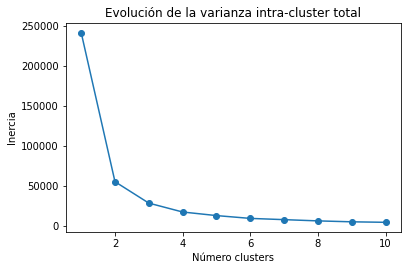

In [ ]:
range_clusters = range(1, 11)
inercia = []

for i in range_clusters:
    modelo = KMeans(
                        n_clusters   = i, 
                        n_init       = 20, 
                        random_state = 50
                     )
    modelo.fit(resultado)
    inercia.append(modelo.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_clusters, inercia, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Inercia');

Vamos a escalar el modelo, ya que hay grandes diferencias entre las tasas de la primera y segunda ola, así tendremos nuestros datos dentro de un rango dado, como posteriormente veremos gráficamente. Además, creamos los **cluster**, en nuestro caso vamos a escoger 4 cluster. En este caso utilizamos fit() para ajustar el modelo a los datos que hemos cargado y el método predict() para realizar predicciones. 

In [ ]:
resultado_escalado = scale(resultado)
modelo = KMeans(n_clusters=4)
modelo.fit(resultado_escalado)
grupos = modelo.predict(resultado_escalado)

Una vez creados los cluster, los relacionamos con nuestra variable comunidades que contiene las Comunidades Autonomas. 

In [ ]:
clusters=pd.concat([provincias,pd.DataFrame(grupos)],axis=1)
clusters.rename(columns={"provincia":"Provincias",0:"Cluster"},inplace=True)
clusters

,Provincias,Cluster
0,Total nacional,3
1,Albacete,1
2,Alicante/Alacant,0
3,Almería,3
4,Araba/Alava,0
5,Asturias,3
6,Avila,0
7,Badajoz,3
8,"Balears, Illes",0
9,Barcelona,1


### **Representación gráfica**
Vamos a visualizar nuestro modelo, para ello, definimos la función que vamos a llevar a cabo, en este caso situación. En nuestro gráfico de dispersión tendremos dos parametros, x e y, que serán los datos escogidos, c que es el color que le vamos a dar a los datos y s el tamaño de la forma en la que se presenta el dato (marker). 

Además, introducimos unos centroides que se situaran en el centro de cada cluster. 

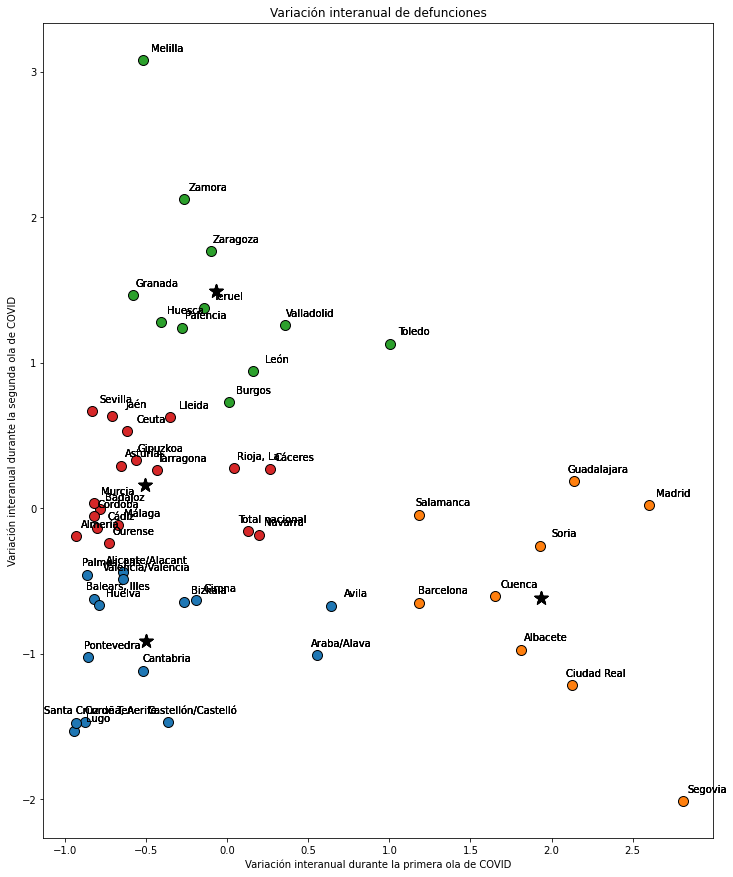

In [ ]:
def situacion (x, y, z):
  fig, ax = plt.subplots()
  for i in np.unique(grupos):
    ax.scatter(
        x = resultado_escalado[grupos == i, 0],
        y = resultado_escalado[grupos == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        s=100,
        marker    = 'o',
        edgecolor = 'black', 
        label= f'Cluster {i}'
    )
    for i in range(53):       
       ax.text(x[i]+0.15,y[i]+0.08, z[i], color = 'black', ha = 'center', va = 'center')
    ax.set_title('Variación interanual de defunciones')
    ax.set_xlabel('Variación interanual durante la primera ola de COVID')
    ax.set_ylabel('Variación interanual durante la segunda ola de COVID')
    ax.scatter(
    x = modelo.cluster_centers_[:,0],
    y = modelo.cluster_centers_[:,1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
  )
  fig.set_figheight(15)
  fig.set_figwidth(12)
  fig.show()
situacion(resultado_escalado[:,0],resultado_escalado[:,1],provincias)

Viendo los resultados podemos establecer algunas conclusiones, por ejemplo, la primera ola afecto especialmente a provincias como Segovia, Madrid o Ciudad Real, sin embargo, el impacto de la segunda ola fue mucho menor. Al contrario de lo que courre en provincias como Melilla, Granada o Sevilla, donde el impacto de la segunda ola fue mayor que el de la primera, es decir, hubo un mayor exceso de muertes. Además, entre provincias de una misma Comunidad Autonoma también hay diferencias, son los casos de Ciudad Real y Toledo o Valladolid y Segovia. Por último, el gráfico muestra que el exceso de muertes no viene marcado por el número de habitantes, ya que vemos resultados similares entre provincias como Madrid y Soria o entre Barcelona y Ávila.

### **Representación tridimensional**
Ahora vamos a introducir una nueva variable y son los datos de la tasa de variación de la tercera ola.

In [ ]:
datos=pd.read_excel('VarCovid_provincias.xlsx')
datos.head()

,provincia,falle_1Ola,falle1_med17_19,1Ola,falle_2Ola,falle2_med17_19,2Ola,falle_3Ola,falle3_med17_19,3Ola,falle_4Ola,falle4_med17_19,4Ola,falle_5Ola,falle5_med17_19,5Ola
0,Total nacional,113148,63962.333333,76.897862,157968,133844.666667,18.023380,135225,117257.5,15.323114,49445,47465.333333,4.170763,76307,64803.000000,17.752265
1,Albacete,1600,553.000000,189.330922,1287,1172.666667,9.749858,1186,1060.5,11.834041,395,409.333333,-3.501629,754,588.000000,28.231293
2,Alicante/Alacant,3011,2403.666667,25.266953,5852,5082.333333,15.143963,6474,4602.0,40.677966,1775,1781.666667,-0.374181,2961,2562.000000,15.573770
3,Almería,851,801.000000,6.242197,2003,1702.000000,17.685076,1936,1545.5,25.266904,665,605.666667,9.796368,1040,797.333333,30.434783
4,Araba/Alava,841,409.666667,105.288853,1022,934.666667,9.343795,763,729.0,4.663923,331,313.666667,5.526036,443,420.333333,5.392546


In [ ]:
columnas = ["1Ola", "2Ola","3Ola"]
resultado = datos[columnas]
provincias = datos["provincia"]

Para visualizar nuestra 3 variables, vamos a introducir una serie de cambios. En este caso volvemos a escalar el modelo para que nuestros resultados se enmarquen dentro de un rango. La C corresponderan a los centroides del modelo y le asignamos colores a nuestros 4 clusters. 
Para poder visualizar nuestras 3 variables lo haremos a través de un gráfico tridimensional, para ello necesitamos cargar Axes3D, que lo hemos hecho arriba y ahora lo podemos introducir en nuestro script. 

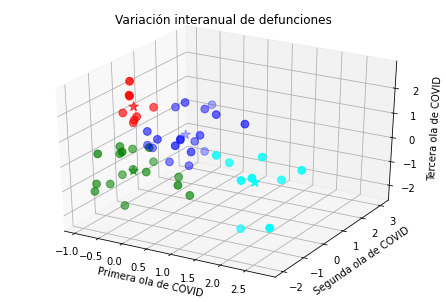

In [ ]:
resultado_escalado = scale(resultado)
modelo = KMeans(n_clusters=4)
modelo.fit(resultado_escalado)
centroids = modelo.cluster_centers_
labels = modelo.predict(resultado_escalado)
C = modelo.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title('Variación interanual de defunciones')
ax.set_xlabel('Primera ola de COVID')
ax.set_ylabel('Segunda ola de COVID')
ax.set_zlabel('Tercera ola de COVID')
ax.scatter(resultado_escalado[:, 0], resultado_escalado[:, 1], resultado_escalado[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=100)

Sin embargo, dado que no hemos dado con la tecla de introducir el nombre de las variables en el gráfico tridimensional, volveremos a los gráficos bidimensionales y llevaremos a cabo un análisis más descriptivo con el resto de olas del COVID. 

### **Otras olas**
Ahora vamos a llevar a cabo un análisis de la 3º y 5º Ola, para ello cargamos de nuevo los datos y asignamos variables. 

In [ ]:
datos=pd.read_excel('VarCovid_provincias.xlsx')
datos.head()

,provincia,falle_1Ola,falle1_med17_19,1Ola,falle_2Ola,falle2_med17_19,2Ola,falle_3Ola,falle3_med17_19,3Ola,falle_4Ola,falle4_med17_19,4Ola,falle_5Ola,falle5_med17_19,5Ola
0,Total nacional,113148,63962.333333,76.897862,157968,133844.666667,18.023380,135225,117257.5,15.323114,49445,47465.333333,4.170763,76307,64803.000000,17.752265
1,Albacete,1600,553.000000,189.330922,1287,1172.666667,9.749858,1186,1060.5,11.834041,395,409.333333,-3.501629,754,588.000000,28.231293
2,Alicante/Alacant,3011,2403.666667,25.266953,5852,5082.333333,15.143963,6474,4602.0,40.677966,1775,1781.666667,-0.374181,2961,2562.000000,15.573770
3,Almería,851,801.000000,6.242197,2003,1702.000000,17.685076,1936,1545.5,25.266904,665,605.666667,9.796368,1040,797.333333,30.434783
4,Araba/Alava,841,409.666667,105.288853,1022,934.666667,9.343795,763,729.0,4.663923,331,313.666667,5.526036,443,420.333333,5.392546


In [ ]:
columnas = ["3Ola", "5Ola"]
resultado = datos[columnas]
provincias = datos["provincia"]

#### **Representación gráfica**

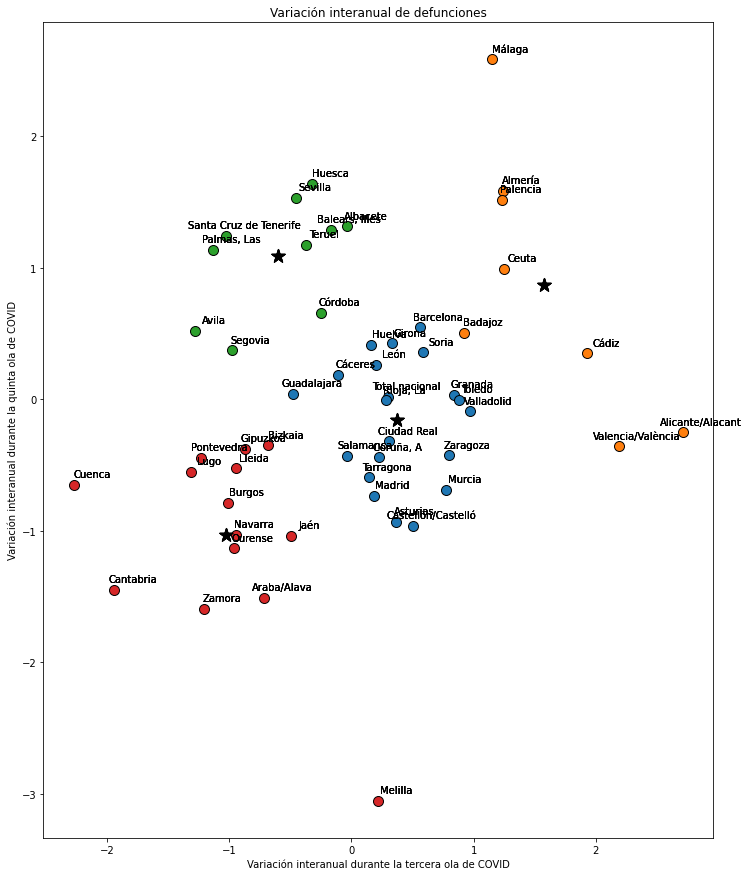

In [ ]:
resultado_escalado = scale(resultado)
modelo = KMeans(n_clusters=4)
modelo.fit(resultado_escalado)
grupos = modelo.predict(resultado_escalado)
def situacion (x, y, z):
  fig, ax = plt.subplots()
  for i in np.unique(grupos):
    ax.scatter(
        x = resultado_escalado[grupos == i, 0],
        y = resultado_escalado[grupos == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        s=100,
        marker    = 'o',
        edgecolor = 'black', 
        label= f'Cluster {i}'
    )
    for i in range(53):       
       ax.text(x[i]+0.15,y[i]+0.08, z[i], color = 'black', ha = 'center', va = 'center')
    ax.set_title('Variación interanual de defunciones')
    ax.set_xlabel('Variación interanual durante la tercera ola de COVID')
    ax.set_ylabel('Variación interanual durante la quinta ola de COVID')
    ax.scatter(
    x = modelo.cluster_centers_[:,0],
    y = modelo.cluster_centers_[:,1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
  )
  fig.set_figheight(15)
  fig.set_figwidth(12)
  fig.show()
situacion(resultado_escalado[:,0],resultado_escalado[:,1],provincias)

Teniendo en cuenta los resultados del gráfico, así como los datos descargados del INE, podemos establecer que se produce la gran concentración de variables en el centro del gráfico se debe a una mayor homogeneización de los resultados en lo que concierne a la quinta ola, ya que la mayoria de provincias presenta un exceso de mortalidad entre el 15 y el 30%. Sin embargo, hay algunas excepciones, es el caso de Melilla, donde inluso se registra un menor número de defunciones con respecto al promedio de ese mismo periodo en los años 2017, 2018 y 2019. Al contrario que ocurre en Malaga, donde se produce el mayor excendente. 
Algo similar ocurre en la tercera ola, donde las provincias de la Comunidad Valenciana, como Valencia y Alicante, sufren los mayores excesos y Cuenca y Cantabria las mayores disminuciones, situandose por debajo de promedio. 
Fijandonos en los cluster, podemos observar que en cluster rojo presenta el menor exceso, seguido del cluster verde y azul, donde cada uno presenta un mayor exceso en una ola diferente, y, por último, el cluster naranja, que es el que presenta un mayor exceso teniendo en cuenta ambas olas. 